In [1]:
%pylab inline

from PyTools import err, binner, nbins
from scipy.ndimage.filters import gaussian_filter
import pres_style, os

Populating the interactive namespace from numpy and matplotlib


/home/chapi/mejia/Programs/miniconda/envs/phd/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [18]:
odir = "/home/chapi/mejia/test_c1_c2/"

# READ GUSTAVO'S RESULTS
glist = sorted([os.path.join(root, file) for root, subs, files in os.walk(odir+"gustavo_results/") for file in files if file.endswith("results")])
gtable = []
for file in glist:
    with open(file, "r") as f:
        for i in xrange(16): line = f.readline()
        gtable.append(map(eval, array(line.split())[[4, 7, 8, 9, 10, 2, 3]]))

gtable = array(gtable)

# READ MINES
atable = loadtxt(odir+"av0/dynbas_output.log", usecols=(2, 3, 4, 5, 6, 7, 8))
atable2 = loadtxt(odir+"avfree/dynbas_output.log", usecols=(2, 3, 4, 5, 6, 7, 8))

gtable[:, 0] = log10(gtable[:, 0])
atable[:, 0] = log10(atable[:, 0])
atable2[:, 0] = log10(atable2[:, 0])

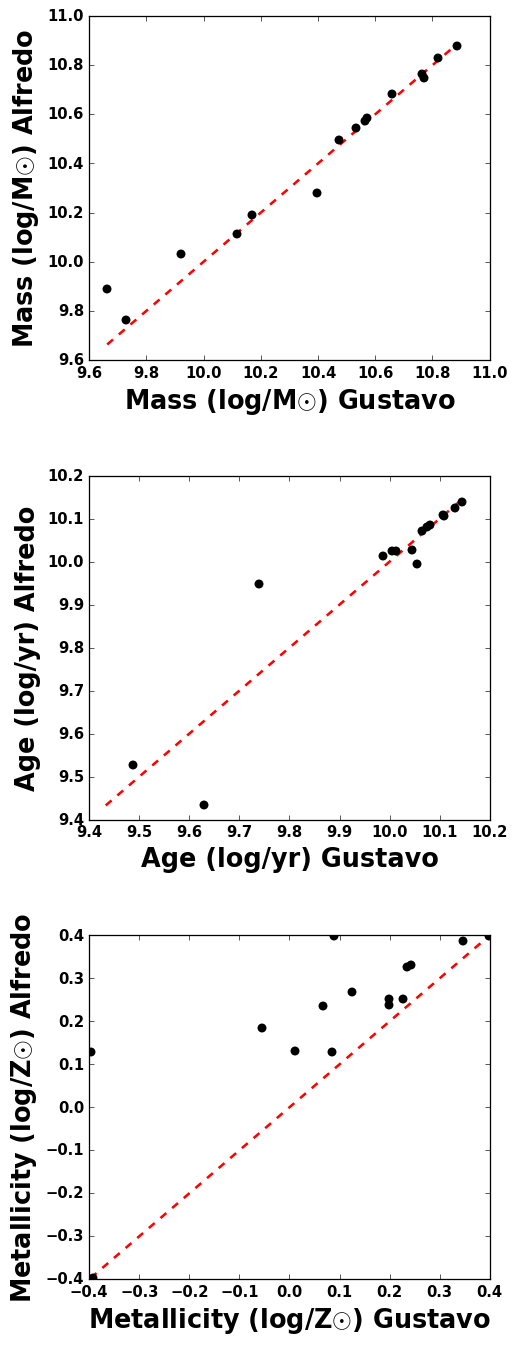

In [29]:
# COMPARE RESULTS
fig, axs = subplots(3, 1, figsize=(6, 15))

lbs = ["Mass (log/M$\odot$)", "Age (log/yr)", "Age (log/yr)", "Metallicity (log/Z$\odot$)",
               "Metallicity (log/Z$\odot$)", "Dust Extinction (mag)"]
for i, ax in zip([0, 1, 3], axs.ravel()):
    lim = [np.min([gtable[:, i], atable[:, i]]), np.max([gtable[:, i], atable[:, i]])]

    ax.plot(lim, lim, "--r")
    ax.plot(gtable[:, i], atable[:, i], "ok")
    
    #ax.set_aspect("equal")
    ax.set_xlabel(lbs[i]+" Gustavo")
    ax.set_ylabel(lbs[i]+" Alfredo")
fig.tight_layout()

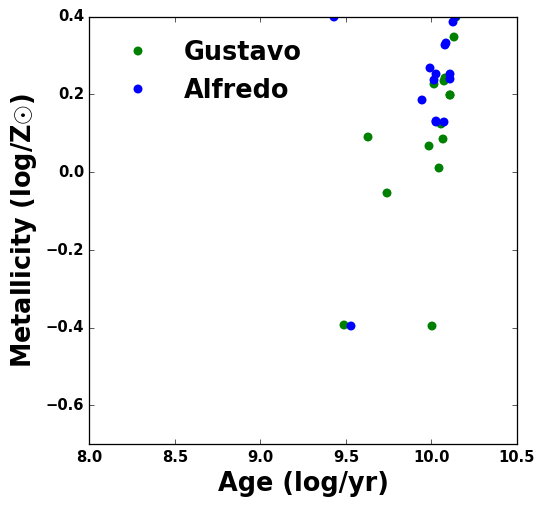

In [22]:
figure(figsize=(6, 6))

plot(gtable[:, 1], gtable[:, 3], "go", label="Gustavo")
plot(atable[:, 1], atable[:, 3], "bo", label="Alfredo")

legend(loc=0)
xlim(8, 10.5)
ylim(-0.7, 0.4)
xlabel(lbs[1])
ylabel(lbs[3])